In [ ]:
!jupyter nbconvert --to html /content/Predictive_Analytics_Assignment_Tommy_Liang.ipynb

In [ ]:
##############################################
# Programmer Name: Tommy Liang
# Class: CIS 3252
# Programming Final project
# Date: 5/5
#
#
#
##############################################

# **Business Intelligence Analysis: Exploring Medical Cost Dataset**

**Collecting data**

In [41]:
# Step 1: Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Step 2: Load the dataset

file_path = "/content/medical_cost.csv"
medical_df = pd.read_csv(file_path)


In [43]:
# Step 3: Data Cleaning and Preprocessing

# Check for missing values
print("Missing values:\n", medical_df.isnull().sum())

Missing values:
 Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**There are no missing values, so no need for imputation.**

In [44]:
# Check for duplicates

duplicates = medical_df.duplicated().sum()
print("Duplicate rows:", duplicates)


Duplicate rows: 0


In [45]:
# Check the column names in the dataset
print(medical_df.columns)


Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [46]:
# Step 4: Descriptive Analytics

# Summary statistics
print("Summary statistics:\n", medical_df.describe())

Summary statistics:
                 Id          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       1.000000    18.000000    15.960000     0.000000   1121.873900
25%     335.250000    27.000000    26.296250     0.000000   4740.287150
50%     669.500000    39.000000    30.400000     1.000000   9382.033000
75%    1003.750000    51.000000    34.693750     2.000000  16639.912515
max    1338.000000    64.000000    53.130000     5.000000  63770.428010


In [47]:
# Frequency distributions for categorical variables

categorical_cols = ["sex", "smoker", "region"]
for col in categorical_cols:
    print("\n", col.capitalize(), "Distribution:")
    print(medical_df[col].value_counts().to_string(), "\n")



 Sex Distribution:
sex
male      676
female    662 


 Smoker Distribution:
smoker
no     1064
yes     274 


 Region Distribution:
region
southeast    364
southwest    325
northwest    325
northeast    324 



In [48]:
# Aggregating data

grouped_by_region = medical_df.groupby("region")["charges"].mean()
print("\nMean charges by region:\n", grouped_by_region)


Mean charges by region:
 region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


**Presenting the data**

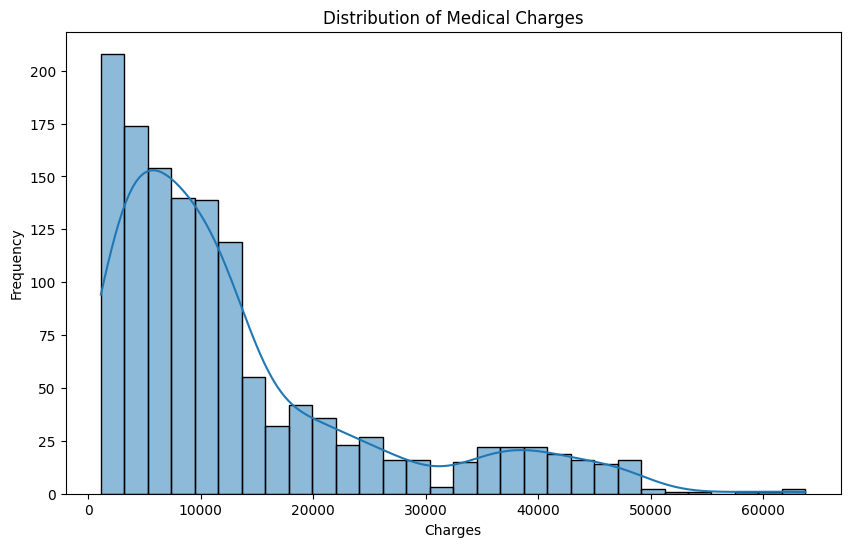

In [49]:
# Step 5: Data Visualization

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(medical_df["charges"], bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

In [50]:
# Print summary statistics
print("Summary Statistics of Medical Charges:")
print(medical_df["charges"].describe())


Summary Statistics of Medical Charges:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


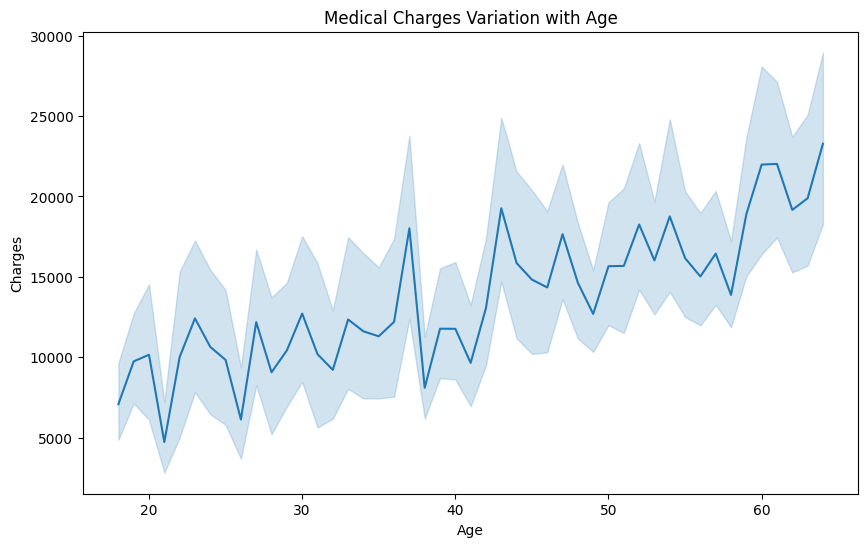

In [51]:
# Line chart to show how medical charges vary with age
plt.figure(figsize=(10, 6))
sns.lineplot(x="age", y="charges", data=medical_df)
plt.title("Medical Charges Variation with Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

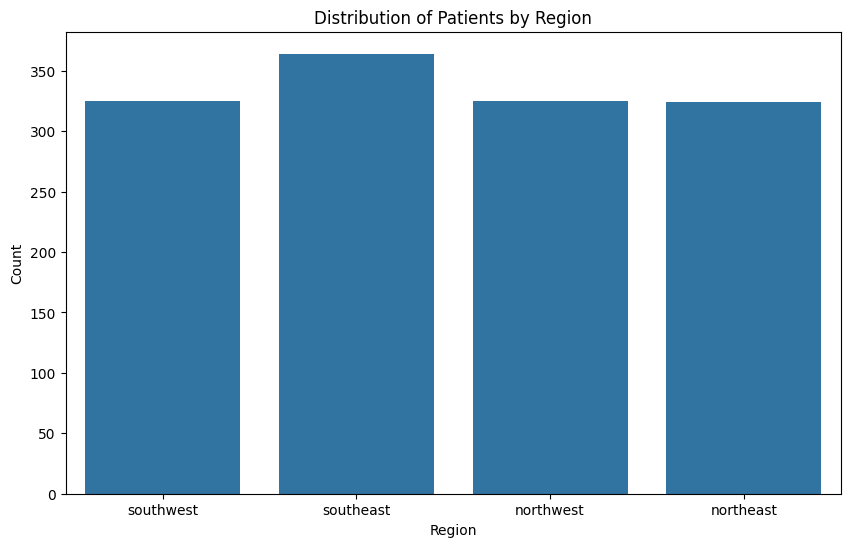

In [52]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x="region", data=medical_df)
plt.title("Distribution of Patients by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

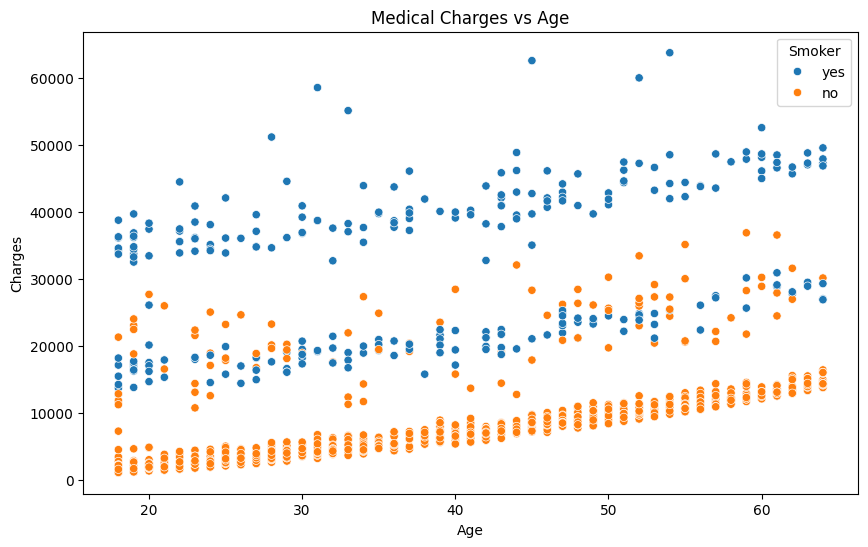

In [53]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="charges", data=medical_df, hue="smoker")
plt.title("Medical Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(title="Smoker")
plt.show()

In [54]:
# Step 6: Predictive or Classification Modeling

# Regression Modeling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Separating features (X) and target variable (y)
X = medical_df[['age', 'bmi', 'children', 'smoker', 'region']]
y = medical_df['charges']


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Initializing and training the logistic regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
# Evaluating the trained model on the test set
y_pred = lr.predict(X_test)

In [65]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}\n")

Mean Squared Error (MSE): 33596915.85



In [66]:
# Define a threshold to binarize charges (e.g., median charge)
threshold = np.median(y_train)

# Binarize the predicted and true values based on the threshold
y_pred_binary = np.where(y_pred > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Calculate accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 84.70%

